# 1.Introduction to Portfolio Analysis
In the first chapter, you’ll learn how a portfolio is build up out of individual assets and corresponding weights. The chapter also covers how to calculate the main characteristics of a portfolio: returns and risk.

#### The effect of diversification
In this exercise you're going to compare performance of four individual stocks, to a portfolio of the same four stocks. You'll see that 2 out of the four stocks will under-perform over a time period of roughly four years, and two will perform quite well.

The stocks you're going to investigate are General Electric, JP Morgan, Microsoft and Proctor & Gamble.

Let's play a little game: pick one stock to invest in, then, let's see how it would have performed over time. There's a 50-50 chance that you'll pick a winning stock, versus a losing stock. Let's look at the data and see whether your stock is one of strong performers.

Available is a data set called stock_returns containing the cumulative returns of these four stocks over time, plus a portfolio of these stocks.

In [4]:
# Import pandas as pd
import pandas as pd
import sys
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objects as go
import numpy as np
import statsmodels.api as sm
from scipy import stats
from arch import arch_model
from arch.__future__ import reindexing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support, roc_curve, roc_auc_score, confusion_matrix

# Read in the csv file
stock_returns = pd.read_csv("small_portfolio.csv", parse_dates=['date'])
stock_returns.set_index('date', inplace=True)


# Check the first five rows of the data
print(stock_returns.tail())

#stock_returns.info()

               GE     JPM   MSFT     PG
date                                   
2018-03-21  13.88  114.74  92.48  77.04
2018-03-22  13.35  109.95  89.79  76.41
2018-03-23  13.07  107.01  87.18  75.91
2018-03-26  12.89  110.31  93.78  76.41
2018-03-27  13.44  108.17  89.47  77.79


In [5]:
#Returns for single stocks
stock_returns = stock_returns.ffill().pct_change()
#Cummulative returns
stock_returns = (stock_returns + 1).cumprod()

#Portfolio equally weight

weights = np.array([0.25, 0.25, 0.25, 0.25])

# Compute the portfolio's daily returns
portfolio = stock_returns.pct_change()
portfolio = stock_returns.dot(weights)

stock_returns['portfolio'] = portfolio

print(stock_returns)
#stock_returns.to_csv(r'stock_returns.csv')

                  GE       JPM      MSFT        PG  portfolio
date                                                         
2015-01-02       NaN       NaN       NaN       NaN        NaN
2015-01-05  0.981644  0.968955  0.990697  0.995245   0.984135
2015-01-06  0.960495  0.943831  0.976262  0.990712   0.967825
2015-01-07  0.960894  0.945271  0.988666  0.995909   0.972685
2015-01-08  0.972466  0.966395  1.017750  1.007298   0.990977
...              ...       ...       ...       ...        ...
2018-03-21  0.553871  1.836134  1.977759  0.851835   1.304900
2018-03-22  0.532721  1.759482  1.920231  0.844870   1.264326
2018-03-23  0.521548  1.712434  1.864414  0.839341   1.234434
2018-03-26  0.514366  1.765242  2.005560  0.844870   1.282509
2018-03-27  0.536313  1.730997  1.913388  0.860128   1.260206

[813 rows x 5 columns]


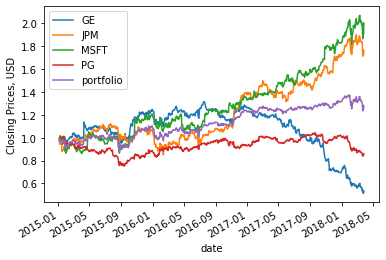

In [6]:
# Plot
stock_returns.plot().set_ylabel("Closing Prices, USD")
plt.show()

#### Calculate mean returns
In this exercise, you're going to calculate performance for a four stock portfolio over the period January 2015 through March 2019. The portfolio consists of Proctor & Gamble, Microsoft, JP Morgan and General Electric stocks. You'll discover that multiplying the mean return of each stock with its portfolio weight, is a very quick and straightforward way to calculate portfolio performance over a given period of time.

The four columns in the DataFrame data contain the prices of these four stocks mentioned above. Have a look at data by inspecting it in the console.

In [7]:
# Read in the csv file
data = pd.read_csv("small_portfolio.csv", parse_dates=['date'])
data.set_index('date', inplace=True)


# Check the first five rows of the data
#print(data.head())

#stock_returns.info()

In [8]:
# Calculate percentage returns
returns = data.pct_change()

# Calculate individual mean returns 
meanDailyReturns = returns.mean()

# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

# Print the portfolio return
print(portReturn)

-1.6782226618545438e-05


#### Portfolio cumulative returns
In the previous exercise, you've calculated the mean performance over a period of time. This gives you one performance number for that entire period. But what if you would want to plot the development of the performance over time? For that, you will need the cumulative performance, not the mean performance. Just like with interest in your bank account, the cumulative performance gives you the compounded return at each date in your dataset. It tells you; "up until today, this is what the total return has been since the start of my data."

Remember because of the compounding effect, you need to use cumprod() for this calculation. NumPy has already been imported as np and available are the daily returns data from the previous exercise under returns. Let's give it a try!

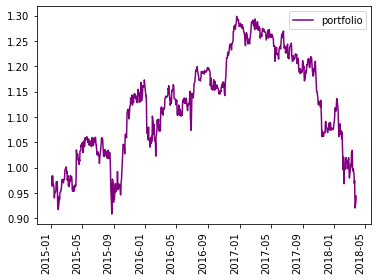

In [9]:
# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)

# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
daily_cum_ret.to_csv(r'daily_cum_returns.csv')

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
#ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

#### Portfolio variance
Your turn! It's time to calculate the risk of our 4-stock portfolio. Let's start with the pricing data, available under data. You'll have to calculate daily percentage returns and assign weights to your portfolio. You'll then continue by calculating the covariance matrix, and use the following formula: Portfolio variance = Weights transposed x (Covariance matrix x Weights) to get the final portfolio variance.

As calculating portfolio variance is an important part of portfolio analysis, make sure you take your time to understand each step, and go back to the slides if you need to. Good luck!

In [7]:
# Get percentage daily returns
daily_returns = data.pct_change()

# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

# Calculate the covariance matrix 
cov_matrix = (daily_returns.cov())*250

print(cov_matrix)

# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print("Portfolio Variance\n", str(np.round(port_variance, 4) * 100) + '%')

            GE       JPM      MSFT        PG
GE    0.045987  0.022828  0.016285  0.010101
JPM   0.022828  0.046660  0.024135  0.010812
MSFT  0.016285  0.024135  0.054054  0.014144
PG    0.010101  0.010812  0.014144  0.020645
Portfolio Variance
 2.55%


#### Standard deviation versus variance
Let's talk about the difference between variance and standard deviation. From the video you already know that the standard deviation 
 is simply the square root of the variance. Both measures are used in practice to calculate market or stock volatility. Why should you use one or the other?

In the variance calculation we square the weights and the variances. Because of this squaring, the variance is no longer in the same unit of measurement as the original data. Taking the root of the variance means the standard deviation is restored to the original unit of measure and therefore much easier to interpret.

Let's calculate the standard deviation. Available are the weights and the cov_matrix from the previous exercise.

In [8]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

15.959999999999999%


Good job! The standard deviation tells you how much the portfolio's return can deviate from the mean historical return. If a portfolio has a 12% average rate of return and a standard deviation of 4%, its return will range from 8-16%. The mean historic return of this particular portfolio is actually close to zero. With an average standard deviation of roughly 16%, this means you're getting a bad deal here! Now that you've learned how to calculate basic risk and return of a portfolio, you're ready to dive deeper into the world of portfolio analysis in the next chapters.

# 2.Risk and Return
Chapter 2 goes deeper into how to measure returns and risk accurately. The two most important measures of return, annualized returns, and risk-adjusted returns, are covered in the first part of the chapter. In the second part, you’ll learn how to look at risk from different perspectives. This part focuses on skewness and kurtosis of a distribution, as well as downside risk.

#### Annualizing portfolio returns
Suppose you invested $101 at the beginning of 2015 in a portfolio. By the end of March 2018, you wonder how your portfolio has performed over time, and whether it is as good as another portfolio which started trading mid-2016. What performance metric do you look at? Well, the annualized return of course!

So let's calculate the annualized rate of return for your portfolio. Since our sample covers 3.2 years, let's use the monthly denomination in the formula for annualized returns. The number of months is already given under months.

Available are the data on portfolio returns under pf_returns, as well as as a separate series pf_AUM containing the portfolio's value, or assets under management (AUM). Good luck!

In [9]:
# Get percentage daily returns
daily_returns = data.pct_change().dropna()

# Assign portfolio weights
weights = np.array([0.25, 0.25, 0.25, 0.25])

#asset_returns = daily_returns.pct_change()
portfolio_returns = daily_returns.dot(weights)

#portfolio_returns.to_csv(r'portfolio_returns.csv')

In [10]:
'''
# Calculate total rate of return from start to end
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize return
annualized_return = ((1 + total_return)**(12/months))-1
print (annualized_return)
'''

'\n# Calculate total rate of return from start to end\ntotal_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]\n\n# Annualize return\nannualized_return = ((1 + total_return)**(12/months))-1\nprint (annualized_return)\n'

#### Comparing annualized rates of return
In the last exercise, you saw that the annualized rate of return was 19.6%. That's pretty high! But since your portfolio consists of only 4 stocks, this high return is indeed possible as it is not very diversified. Let's compare the portfolio's annual rate of return, with that of the S&P500, which is much more diversified.

The value of the S&P500 between 1st of January 2015 and end of December 2018 has been made available. That's 4 years of data. You have full years this time, so use the year denomination in the formula for the annualized return. The data is stored under sp500_value.

In [11]:
# Read in the csv file
sp500_value = pd.read_csv("sp500.csv", parse_dates=['date'])
sp500_value.set_index('date', inplace=True)

print(sp500_value)

# Calculate the total return from the S&P500 value series
total_return = (sp500_value.loc['2018-12-19'] - sp500_value.loc['2015-01-02']) / sp500_value.loc['2015-01-02']
print(total_return)

# Annualize the total return spanning 4 years
annualized_return = ((1 + total_return)**(1/4))-1
print (annualized_return)

                 S&P500
date                   
2015-01-02  2058.199951
2015-01-05  2020.579956
2015-01-06  2002.609985
2015-01-07  2025.900024
2015-01-08  2062.139893
...                 ...
2019-03-13  2810.919922
2019-03-14  2808.479980
2019-03-15  2822.479980
2019-03-18  2832.939941
2019-03-19  2832.570068

[1059 rows x 1 columns]
S&P500    0.218035
dtype: float64
S&P500    0.050546
dtype: float64


Wonderful work! You see that once you get the hang of it, annualizing returns is relatively straightforward. But it is oh so important when you are comparing portfolio performance numbers, as you're using the same yardstick to measure them against. In the next lesson, you'll learn more about returns and how you should take into account the level of risk taken to achieve those returns. In fact, you'll see that the portfolio returns, although much higher, might not be that great compared to the S&P500 after all, when you take risk into account!

#### S&P500 Sharpe ratio
In this exercise, you're going to calculate the Sharpe ratio of the S&P500, starting with pricing data only. In the next exercise, you'll do the same for the portfolio data, such that you can compare the Sharpe ratios of the two.

Available for you is the price data from the S&P500 under sp500_value. The risk-free rate is available under rfr, which is conveniently set to zero. Let's give it a try!

In [12]:
rfr = 0

# Calculate total return and annualized return from price data 
total_return = (sp500_value.loc['2018-12-19'] - sp500_value.loc['2015-01-02']) / sp500_value.loc['2015-01-02']

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(1/4))-1

# Create the returns data 
returns_sp500 = sp500_value.pct_change()

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns_sp500.std() * np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) / vol_sp500)
print (sharpe_ratio)

S&P500    0.371287
dtype: float64


Good job! Notice that it takes quite a few steps to calculate the Sharpe ratio from your annualized returns and volatility. Let's now repeat these steps on the portfolio data, and see how the portfolio measures up.

#### Skewness of the S&P500
We already know from the video that the S&P500 should be normally distributed, without too much skewness (when you have enough data). However, since you're working with a short data sample spanning only a few years, there might actually be some skewness in your sample. To make you aware of this potential sample skewness, let's plot the data and have a look.

The returns data from the S&P500 is available as returns_sp500.

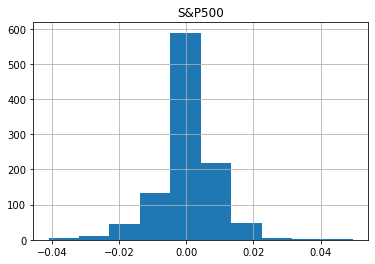

In [13]:
returns_sp500 = sp500_value.pct_change()
#returns_sp500

# Create a histogram of the S&P500 returns and show the plot
returns_sp500.hist()
plt.show()

In [14]:
print("mean : ", returns_sp500.mean() * 100)
print("vol  : ", returns_sp500.std() * 100)
print("skew : ", returns_sp500.skew())
print("kurt : ", returns_sp500.kurtosis())

mean :  S&P500    0.0339
dtype: float64
vol  :  S&P500    0.861002
dtype: float64
skew :  S&P500   -0.383199
dtype: float64
kurt :  S&P500    3.922391
dtype: float64


Looking at the histogram of the S&P500 returns, what can you say about the skewness in this data?

The S&P500 data has a negative skew; the mean is to the left of the mode and median, this data has more positive returns compared to a normal distribution with a mean of zero.

Correct: A negative skew means there is a 'bump to the right' compared to the normal distribution, which is what the sample data looks like.

#### Comparing distributions of stock returns
Let's have a look at how you can use skewness and kurtosis in your investment decisions. In this exercise you're going to compare the distributions of singular stocks with the portfolio, and see whether combining multiple stocks in a portfolio improves your returns distribution.

In [15]:
# Read in the csv file
stock_returns = pd.read_csv("small_portfolio.csv", parse_dates=['date'])
stock_returns.set_index('date', inplace=True)

#Returns for single stocks
stock_returns = stock_returns.ffill().pct_change()

#stock_returns

# Assign portfolio weights
weights = np.array([0.25, 0.25, 0.25, 0.25])

#asset_returns = daily_returns.pct_change()
pf_returns = stock_returns.dot(weights)

pf_returns

date
2015-01-02         NaN
2015-01-05   -0.015865
2015-01-06   -0.016650
2015-01-07    0.004973
2015-01-08    0.018811
                ...   
2018-03-21   -0.001182
2018-03-22   -0.029299
2018-03-23   -0.020831
2018-03-26    0.024840
2018-03-27   -0.001157
Length: 813, dtype: float64

skew :  GE      0.177313
JPM     0.018815
MSFT    0.515431
PG     -0.259934
dtype: float64
kurt :  GE      7.766370
JPM     3.831448
MSFT    9.882177
PG      2.848092
dtype: float64


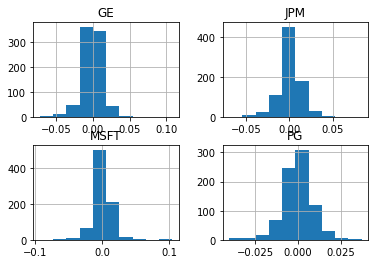

In [16]:
# Print the histograms of the stocks in the portfolio
stock_returns.hist()

# Print skewness and kurtosis of the stocks
print ("skew : ", stock_returns.skew())
print ("kurt : ", stock_returns.kurtosis())

skew :  GE      0.177313
JPM     0.018815
MSFT    0.515431
PG     -0.259934
dtype: float64
kurt :  GE      7.766370
JPM     3.831448
MSFT    9.882177
PG      2.848092
dtype: float64


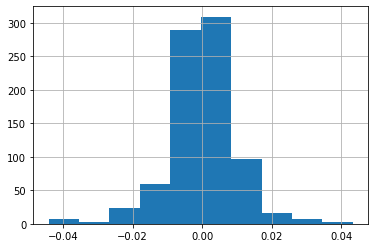

skew :  -0.2408259043160594
kurt :  3.5823389649394213


In [17]:
# Print skewness and kurtosis of the stocks
print ("skew : ", stock_returns.skew())
print ("kurt : ", stock_returns.kurtosis())

# Print the histogram of the portfolio
pf_returns.hist()
plt.show()

# Print skewness and kurtosis of the portfolio
print ("skew : ", pf_returns.skew())
print ("kurt : ", pf_returns.kurtosis())

#### Sortino ratio
For this exercise, the portfolio returns data are stored in a DataFrame called df, which you'll use to calculate the Sortino ratio. The Sortino ratio is just like the Sharpe ratio, except for that it uses the standard deviation of the negative returns only, and thereby focuses more on the downside of investing.

Let's see how big the Sortino ratio is compared to the earlier calculated Sharpe ratio. The risk-free rate rfrand the target return target are already defined and are both zero.

In [18]:
target = 0
rfr = 0

# Create a downside return column with the negative returns only
downside_returns = pf_returns[pf_returns < 0.1]
#downside_returns

In [19]:
# Create a downside return column with the negative returns only
downside_returns = pf_returns[pf_returns < target]

# Calculate expected return and std dev of downside
expected_return = pf_returns.mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

Expected return  :  0.021416982955711032
Downside risk   :  0.7149254722199057
Sortino ratio :  0.02995694486756702


Wonderful work! You see that the Sortino ratio is slightly lower than the Sharpe ratio we calculated earlier, although that was calculated on annualized returns, so they will differ either way. The Sortino ratio is a slightly more sophisticated ratio compared to Sharpe, as it focusses on negative volatility only. Let's now have a look at another measure or risk, namely maximum draw-down.

#### Maximum draw-down portfolio
In this exercise, you'll learn how to calculate the maximum draw-down of the S&P500 (also known as "peak to trough performance drop"). Maximum draw-down is an incredibly insightful risk measure. It tells you what has been the worst performance of the S&P500 in the past years.

It is the reason why many investors shy away from crypto-currencies; nobody likes to lose a large percentage of their investment (e.g., 70%) in a short period.

In order to calculate the maximum draw-down of the S&P500, the daily S&P500 prices have been made available to you in a DataFrame called df.

In [20]:
print(sp500_value)


                 S&P500
date                   
2015-01-02  2058.199951
2015-01-05  2020.579956
2015-01-06  2002.609985
2015-01-07  2025.900024
2015-01-08  2062.139893
...                 ...
2019-03-13  2810.919922
2019-03-14  2808.479980
2019-03-15  2822.479980
2019-03-18  2832.939941
2019-03-19  2832.570068

[1059 rows x 1 columns]


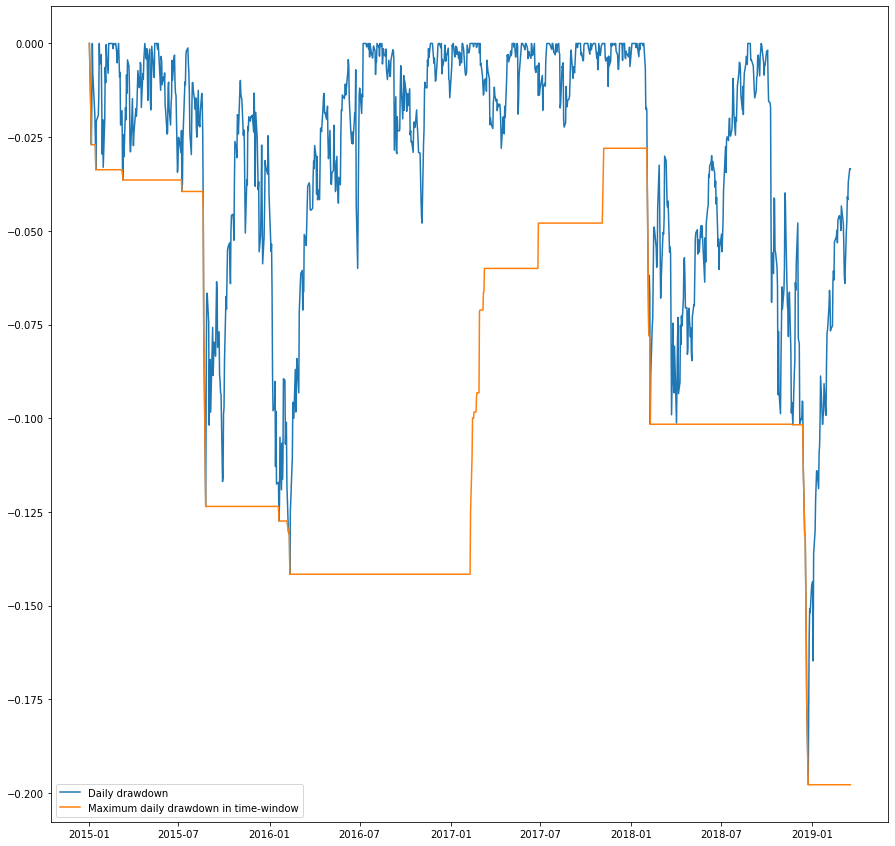

In [21]:
# Calculate the max value 
roll_max = sp500_value.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = sp500_value/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot( daily_draw_down, label='Daily drawdown')
plt.plot( max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()



# 3. Performance Attribution
In chapter 3, you’ll learn about investment factors and how they play a role in driving risk and return. You’ll learn about the Fama French factor model, and use that to break down portfolio returns into explainable, common factors. This chapter also covers how to use Pyfolio, a public portfolio analysis tool.

#### Active return
In this first exercise, you're going to calculate the active return of a portfolio that's managed against a benchmark. You've learned many ways of how to calculate total return over a period. For this exercise, you'll use the simple mean returns multiplied with the weights to obtain a total return for both the portfolio as well as the benchmark. Available is portfolio data containing weights and asset returns under portfolio_data. Have a look at the data by running portfolio_data.head(10) in the IPython Shell. Good luck!

In [22]:
# Read in the csv file
portfolio_data = pd.read_csv("large_pf.csv", index_col=0)
#portfolio_data.set_index(' ', inplace=True)


# Check the first five rows of the data
#print(portfolio_data.head())

In [23]:
#Inspect the portfolio weights by checking whether they sum up to 100%, by using the .sum() function on the pf_weights column.

# Check the portfolio weights
print(portfolio_data.pf_weights.sum())

#Calculate the portfolio return by multiplying the portfolio weights column with the mean returns of the assets, and summing that to get the total return.

# Calculate return of the portfolio
total_return_pf = (portfolio_data['pf_weights']*portfolio_data['mean_return']).sum()

#Repeat the steps and calculate the total return of the benchmark.

# Calculate return of the benchmark
total_return_bm = (portfolio_data['bm_weights']*portfolio_data['mean_return']).sum()

#Calculate the active return by subtracting the benchmark performance from the portfolio performance. Print the results.

# Calculate and print the active return
active_return = total_return_bm - total_return_pf
print ("%.2f%%" % active_return)

100.0
-22.58%


Great work! You now have calculated the most relevant performance number for a benchmarked portfolio. Next time someone tells you about their great performance, make sure to ask about their performance relative to the benchmark, as that's where a talented portfolio manager can differentiate him/herself.

#### Industry attribution
In this exercise, you're going to calculate the relative industry position of your portfolio, versus a benchmark. As a portfolio manager you need to understand your portfolio's underweight and overweight positions (or "industry bets"), as they are a large driver of performance, as well as a potential source of risk.

The DataFrame portfolio_data is available, containing details about the industry classification, obtained from the Global Industry Classification System or "GICS", of your portfolio holdings, as well as your portfolio weights and the benchmark weights.

In [24]:
# Print the sum of the bm and pf weights
print ("benchmark weights:", portfolio_data.bm_weights.sum())
print ("portfolio weights:",portfolio_data.pf_weights.sum())

# Group dataframe by GICS sectors 
grouped_df=portfolio_data.groupby('GICS Sector').sum()

#Now calculate the active weights of the portfolio by comparing the portfolio weights in the column pf_weights, with the benchmark weights in the column bm_weights. Inspect the active weights.

# Calculate active weights of portfolio
grouped_df['active_weight']=grouped_df['pf_weights']-grouped_df['bm_weights']
print (grouped_df['active_weight'])

benchmark weights: 100.001
portfolio weights: 100.0
GICS Sector
Consumer Discretionary         20.257
Consumer Staples               -5.176
Energy                          0.000
Financials                     -2.116
Health Care                     2.865
Industrials                     2.465
Information Technology          8.693
Materials                      -2.043
Real Estate                     2.014
Telecommunications Services    -1.367
Utilities                     -25.593
Name: active_weight, dtype: float64


#### Momentum factor
In this exercise, you are going to investigate the correlation of the S&P500 returns with 2 factors, momentum and value.

A stock is showing "momentum" if its prior 12-month average of returns is positive. The momentum factor is therefore formed by combining stocks that show consistent positive historic returns. The value factor looks at stocks that are inexpensive relative to some measure of fundamental value. For example price-to-earnings and price-to-book are typically ratios to measure "value". Let's see how our S&P500 returns relate to the returns of these factors.

Available is a DataFrame df containing the returns of the two factors and the S&P500 over time.

In [25]:
# Read in the csv file
df = pd.read_csv("pf_factors.csv", index_col=0)
#df.set_index('date', inplace=True)
df.rename(columns={'S&P500':'sp500','WML': 'momentum', 'value_factor': 'value'}, inplace=True)


# Check the first five rows of the data
print(df.head())

               sp500  momentum  value  portfolio
date                                            
2016-01-04 -1.530373     -1.69  -1.53  -1.651745
2016-01-05  0.201223      0.38   0.10   0.408161
2016-01-06 -1.311540      1.27  -1.22   0.325555
2016-01-07 -2.370044      0.21  -2.38  -0.698259
2016-01-08 -1.083837     -0.20  -0.91  -0.959352


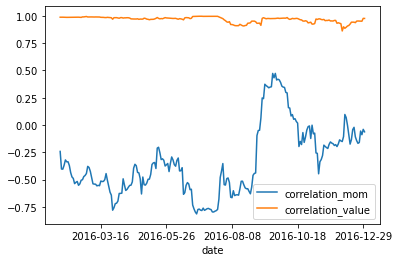

In [26]:
# Calculate 20-day rolling correlation with momentum 
df['correlation_mom']=df['sp500'].rolling(20).corr(df['momentum'])

# Calculate 20-day rolling correlation with value
df['correlation_value']=df['sp500'].rolling(20).corr(df['value'])

# Plot the correlations
df['correlation_mom'].plot()
df['correlation_value'].plot()
plt.legend()
plt.show()

#### Value factor
In the previous exercise you've looked at the S&P500 exposures, and saw that there was a large consistent exposure to the value factor, but a very fluctuating correlation to momentum.

Let's now check how our portfolio measures up to this, and let's especially focus on value. Available to you is a DataFrame called factor_data containing the factor returns as well as your portfolio returns. Start by inspecting the DataFrame factor_data in the IPython shell using factor_data.head().

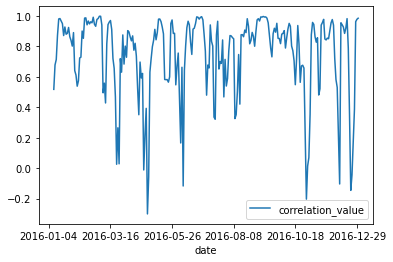

In [27]:
# Calculate the pairwise correlation
df.corr()

# Calculate rolling 5 day correlation 
df['correlation_value']=df['portfolio'].rolling(5).corr(df['value'])

# Plot the rolling correlation
df['correlation_value'].plot()
plt.legend()
plt.show()

In the correlation graph between your portfolio and the value factor, you see that it fluctuates and dips to a low correlation occasionally. What could be the reason the correlation suddenly dips?

Correct! There are so many moving parts, and the interaction between your portfolio and the underlying factors changes constantly. It would only be stable if you would completely follow the factor composition.

#### Fama French factor correlations
In this exercise you want to check how much correlation your portfolio returns have with the Fama French factors. With a quick correlation table, you can very easily gain insight into how your portfolio returns move with for example the excess market return or the size and value factors. Remember, the Fama French factor model was defined as follows:

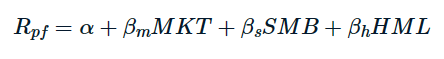

Available is the data containing the factor returns and your portfolio returns under factor_returns. Let's give it a try!

In [28]:
# Read in the csv file
factor_returns = pd.read_csv("factors_pf_returns.csv", index_col=0)
#print(factor_returns.head())

In [29]:
# Print the correlation table 
print(factor_returns.corr())

              Mkt-RF       SMB       HML        RF  pf_returns
Mkt-RF      1.000000  0.331250  0.099800  0.087073    0.738586
SMB         0.331250  1.000000 -0.108081  0.076750    0.162303
HML         0.099800 -0.108081  1.000000 -0.049019   -0.237647
RF          0.087073  0.076750 -0.049019  1.000000    0.039383
pf_returns  0.738586  0.162303 -0.237647  0.039383    1.000000


##### Question
Based on what you see in the correlation table, do you think this portfolio manager has strong strategic investment skills?

Correct! The correlation with the market returns is actually quite high, at around 0.74 that's a lot of performance coming from simple market movements. I hope you're not paying high fees for that!

#### Linear regression model
In this exercise you're going to use the Fama French model to explain the returns in your portfolio. You'll first walk through the linear regression model taking all the different steps, and obtain the summary at the end to interpret the results.

In this exercise you'll use statsmodels. You might have come across the linear regression model in scikit-learn. If you are curious how the two options compare, you can read more in this blogpost.

Available is a dataset called factor_returns which contains portfolio returns as well as the Fama French factors. Good luck!

In [30]:
# Define the model
model = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit()

# Create model predictions
predictions = model.predict(factor_returns[['Mkt-RF','SMB', 'HML']]) 

# Print out the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pf_returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              158.8
Date:                Wed, 18 Jan 2023   Prob (F-statistic):                    1.55e-57
Time:                        16:40:24   Log-Likelihood:                         -185.67
No. Observations:                 252   AIC:                                      377.3
Df Residuals:                     249   BIC:                                      387.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.8234      0.040     20.627      0.000       0.745       0.902
SMB           -0.2272      0.064     -3.545      0.000      -0.353      -0.101
HML           -0.4826      0.056     -8.611      0.000      -0.593      -0.372
==============================================================================
Omnibus:                      143.224   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1746.552
Skew:                           1.972   Prob(JB):                         0.00
Kurtosis:                      15.279   Cond. No.                         1.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Question
What can you say about how the Fama French factors explain the portfolio returns? Do they significantly explain the portfolio returns?

The market excess returns are positively related to the portfolio returns, and the other two factors SMB and HML are negatively related. They all have a significant effect on the portfolio returns.

Correct! The low P-values tell you that the effects of the factors on the portfolio return is significant. The sign of the coefficient tells you whether the effect is positive or negative.

#### Fama French Factor model
In this exercise, you are going focus on efficiently obtaining just the beta coefficients of the Fama French model. As you've seen in the video, those betas indicate how much of the portfolio's return changes if that particular factor's return changes.

Sometimes, all you want to do is to check whether the factor relates negatively, or positively to you portfolio returns. You can see this directly from the signs of the coefficients. Available again is the factor_returns data for you. Let's try!

In [31]:

import statsmodels.api as sm

# Obtain the beta coefficients
b1, b2, b3 = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit().params

# Print the betas
print ('Sensitivities of active returns to factors:\nMkt-Rf: %f\nSMB: %f\nHML: %f' %  (b1, b2, b3))

Sensitivities of active returns to factors:
Mkt-Rf: 0.823443
SMB: -0.227198
HML: -0.482598


Great work! Now that you can comfortably run the Fama French factor model on portfolio returns, you may almost call yourself a professional! Regressions are widely used in portfolio analysis to help understand how return series are related to each other. In the next lesson, you'll learn about tools that are publicly available that can make more complicated portfolio analysis much easier to perform.

# 4. Portfolio Optimization
In this last chapter, you learn how to create optimal portfolio weights, using Markowitz’ portfolio optimization framework. You’ll learn how to find the optimal weights for the desired level of risk or return. Lastly, you’ll learn alternative ways to calculate expected risk and return, using the most recent data only.

#### Calculating expected risk and returns
For this exercise, you're going to start with the raw price data. What you'll need for portfolio optimization, is the expected risk and return from this data.

With PyPortfolioOpt, you can calculate the expected risk and return in just one line of code, so that makes it very easy for you. The library you need is called pypfopt in short. FYI, you'll see in the next exercise that PyPortfolioOpt gives you the same output if you were to calculate it by hand. Let's give it a try!

In [32]:
# Read in the csv file
stock_prices = pd.read_csv("small_portfolio.csv", parse_dates=['date'])
stock_prices.set_index('date', inplace=True)

#print(stock_prices.head())

In [33]:
# Import the packages 
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
print (mu, Sigma)

GE     -0.175812
JPM     0.185643
MSFT    0.223083
PG     -0.045684
dtype: float64             GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


Good work! You've taken the first few important steps in portfolio optimization. Now that you have calculated the efficient frontier with your given measures of expected risk and return, you can select an optimal portfolio from that frontier, that fits your risk and return appetite. That might be the portfolio with the Maximum Sharpe ratio, or even the portfolio with the lowest level of risk.

#### PyPortfolioOpt risk functions
The objective of the Markowitz portfolio optimization problem is to minimize the portfolio variance, given a bunch of constraints. Do you remember how you calculate this from chapter 2? Portfolio variance = weights transposed * covariance matrix * weights. WithPyPortfolioOpt we call the covariance matrix sigma, to denote that this is a sample covariance 
.

In this exercise you will see that thePyPortfolioOpt functions to calculate sigma, gives the exact same result if you were to calculate the covariance by hand. The same goes for the expected return calculations, you can also verifyPyPortfolioOpt gives the same output as calculating annualized daily returns by hand. Available are the stock_prices. Let's explore this a bit further…

In [34]:
# Get the returns from the stock price data
returns=stock_prices.pct_change()

# Calculate the annualized covariance matrix 
covMatrix = returns.cov()*252

# Calculate the covariance matrix Sigma from a`PyPortfolioOpt` function
Sigma = risk_models.sample_cov(stock_prices)

# Print both covariance matrices
print (covMatrix)

print (Sigma)

            GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810
            GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


Good job! What did you notice? They are exactly the same, aren't they! This exercise is just to show you that under the hood, thePyPortfolioOpt functions use the same calculations that you are already familiar with, and that these aren't black-box type of calculations. In fact,PyPortfolioOpt can be used to make your portfolio analysis easier, and to skip a few manual steps when you are calculating things. Let's now move on to explore more functionality ofPyPortfolioOpt.

#### Optimal portfolio performance
Let's now continue with the efficient frontier ef that you calculated in a previous exercise for the small portfolio. You still need to select an optimal portfolio from that efficient frontier ef, and check its performance. Let's use the efficient_return option. This function selects the portfolio with the minimized risk given a target return. A portfolio manager is often asked to manage a portfolio under certain risk and return constraints, so this is a very useful function for that.

mu and Sigma are already calculated for you and ef is also available.

In [35]:
# Get the minimum risk portfolio for a target return 
weights = ef.efficient_return(0.2)
print (weights)

# Show portfolio performance 
ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.0), ('JPM', 0.4926529085352377), ('MSFT', 0.4900890447252643), ('PG', 0.0172580467394981)])
Expected annual return: 20.0%
Annual volatility: 19.2%
Sharpe Ratio: 0.94


(0.2, 0.19152666984849026, 0.9398168941296344)

Fantastic! You've now completed your first portfolio optimization problem! By setting the target return of 0.2, mind you this is 20%, you get a mix of three stocks with positive weights in the portfolio. You'll see in a following exercise that this is in fact different from the portfolio that optimizes to obtain the maximum Sharpe ratio. Also notice how you can easily usePyPortfolioOpt for rather complex optimization problems. It has many different options to tweak, and you'll learn more about those options in the following lessons.

#### Portfolio optimization: Max Sharpe
In this exercise, you're going to calculate the portfolio that gives the Maximum Sharpe ratio. Often, this is the portfolio the investor wants to invest in, as it provides the highest possible return to risk ratio.PyPortfolioOpt makes it very easy to calculate this portfolio from a set of historical price data.

Available for you are the mean historic return for a small portfolio of stocks under mu and a covariance matrix belonging to our portfolio under Sigma. You'll need these as inputs to calculate the Efficient Frontier and Maximum Sharpe portfolio. Let's try it!

In [36]:
# Define the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()
print (raw_weights_maxsharpe) 
print (cleaned_weights_maxsharpe)

OrderedDict([('GE', 0.0), ('JPM', 0.4251955192429594), ('MSFT', 0.5748044807570406), ('PG', 0.0)])
OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])


##### Question
Why are some of the weights in the Maximum Sharpe portfolio zero?

Some of the expected returns of the stocks are negative. That does not necessarily exclude them from the Maximum Sharpe portfolio, but in this case, those negative stocks just lower returns without lowering the risk of the portfolio. That's why they are not part of the optimal risk-return portfolio.

That's correct! Looking closely at some of the stocks in the portfolio, two have negative historic performance, and by adding them they don't actually lower the risk of the portfolio. That means that when we optimize for risk and return, apparently it is optimal not to invest in those.

#### Minimum volatility optimization
In this exercise, you're going to compare the minimum volatility and the Maximum Sharpe portfolios. As a portfolio manager you often want to understand how your chosen portfolio measures up to the minimum volatility portfolio. WithPyPortfolioOpt you can compare the two quickly, without having to write two different constrained optimization problems, which can be quite complex. Available for you is the efficient frontier from the previous exercise under ef. Let's give it a try!

In [37]:
# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
#print (mu, Sigma)

In [38]:
#Inspect the Maximum Sharpe portfolio from the previous exercise by using portfolio_performance() numbers from ef.

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()

# Show portfolio performance 
print(cleaned_weights_maxsharpe)
#ef.portfolio_performance(verbose=True)
perf_max_sharpe = ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])
Expected annual return: 20.7%
Annual volatility: 19.6%
Sharpe Ratio: 0.96


In [39]:
# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
#print (mu, Sigma)

In [40]:
#Change the optimizer into the min vol optimizer, run the code again and inspect the weights and the performance numbers

# Calculate weights for the minimum volatility portfolio
raw_weights_minvol = ef.min_volatility()
cleaned_weights_minvol = ef.clean_weights()

# Show portfolio performance
print(cleaned_weights_minvol)
perf_min_volatility = ef.portfolio_performance(verbose=True)
#perf_min_volatility = ef.portfolio_performance(verbose=True)

OrderedDict([('GE', 0.15732), ('JPM', 0.11714), ('MSFT', 0.04704), ('PG', 0.6785)])
Expected annual return: -2.6%
Annual volatility: 13.3%
Sharpe Ratio: -0.35


Good work! With a few minor adjustments you can easily change the optimizer to obtain a different type of portfolio. Now let's discuss how these portfolios differ.

#### Comparing max Sharpe to min vol
In this exercise let's have a closer look at the weights and performance of the Maximum Sharpe and minimum volatility portfolios, and compare them. This exercise will help you understand the characteristics of these two different portfolios. Available are cleaned_weights_minvol, cleaned_weights_maxsharpe, perf_min_volatility, and perf_max_sharpe.

In [41]:
# Print min vol and max sharpe results
print(cleaned_weights_minvol,cleaned_weights_maxsharpe,perf_min_volatility,perf_max_sharpe, sep="\n")

OrderedDict([('GE', 0.15732), ('JPM', 0.11714), ('MSFT', 0.04704), ('PG', 0.6785)])
OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])
(-0.026415861751657176, 0.13292386607830184, -0.3491913312566071)
(0.20716402573897588, 0.1959516973774276, 0.9551538886569299)


##### Question
Which statement correctly describes the difference between the maximum Sharpe portfolio and the minimum volatility portfolio you calculated in the previous exercises?

The min vol portfolio has a lower performance but lower risk, since all stocks have a positive weight in the min vol portfolio and some stocks have a negative expected return.

Indeed, the minimum volatility portfolio spreads the risk more by investing in all the stocks, although some have a negative performance, this leads to an overall lower performance, but also to lower risk.

#### Exponentially weighted returns and risk
In this exercise, you're going to perform portfolio optimization with a slightly different way of estimating risk and returns; you're going to give more weight to recent data in the optimization.

This is a smart way to deal with stock data that is typically non-stationary, i.e., when the distribution changes over time. Implementation can be quickly done by changing the risk model you use to calculate Sigma, and the returns calculation you use to get mu. The stock prices dataset is available as stock_prices. Let's try!

In [42]:
# Define exponentially weightedSigma and mu using stock_prices
Sigma = risk_models.exp_cov(stock_prices, span=180, frequency=252)
mu = expected_returns.ema_historical_return(stock_prices, frequency=252, span=180)

# Calculate the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum sharpe ratio optimization
cleaned_weights_maxsharpe_EW = ef.max_sharpe()

# Show portfolio performance 
perf_max_sharpe_EW = ef.portfolio_performance(verbose=True)

Expected annual return: 27.1%
Annual volatility: 24.4%
Sharpe Ratio: 1.03


Great job! In this setting you used observations from more recent data to weigh more heavily in your decision, which is especially interesting if you're managing a trend following portfolio. Also, you see that creating more complicated portfolio constructions is very easy withPyPortfolioOpt, allowing you to test and compare different set-ups with a few minor changes.

#### Comparing approaches
In this exercise, you're going to investigate whether the maximum Sharpe portfolios differ when you are using the normal historic expected risk and returns, and when using the exponentially weighted risk and returns. You saw during the video that the exponentially weighted volatility follows the real volatility much closer, but do you actually see a big difference in the portfolio weights when using one, or the other? That's what you'll find out.

The exponentially weighted risk and return have been calculated using a span of 252 trading days, so it looks back through a maximum period of a year. Available for you are: cleaned_weights_maxsharpe, perf_max_sharpe, cleaned_weights_maxsharpe_EW, perf_max_sharpe_EW. The _EW part stands for exponentially weighted.

In [43]:
# Print the weights of both portfolios types
print(cleaned_weights_maxsharpe, cleaned_weights_maxsharpe_EW, sep="\n")

OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])
OrderedDict([('GE', 0.0), ('JPM', 0.1307638624127916), ('MSFT', 0.8692361375872084), ('PG', 0.0)])


In [44]:
# Print the performance of both portfolios types
print (perf_max_sharpe) # = ef.portfolio_performance(verbose=True)
print (perf_max_sharpe_EW) # = ef_2.portfolio_performance(verbose=True)

(0.20716402573897588, 0.1959516973774276, 0.9551538886569299)
(0.27060086764443547, 0.24440611989379227, 1.0253461237113668)


##### Question
What could be a reason why the two portfolios are actually not that different to each other?

##### Possible Answers

The span of 252 is pretty long relative the the full dataset, which means both are calculated with largely the same data input.

The trends in the data are relatively persistent: that's why weights for example GE and PG are zero for both portfolios, and both portfolios only invest in JPM and MSFT.

Correct! Since the span is relatively long, and the trends are persistent, this means that the more recent data is pretty similar to the full dataset. In that sense, you are not getting a very large gain by using the exponentially weighted approach when your data is predictable and has persistent trends.

#### Changing the span
At the last exercise you discovered that the span of the exponentially weighted risk and return can have an impact on what the optimal portfolio looks like. In fact, the span has a very big influence! By setting the span, you can either use data for say only the most recent days, or use data from the most recent years. In the limit, when the span is as long as the full sample, it will be equal to using the normal historic mean.

Now let's get a feel for how a short and long span changes your optimal portfolio. Available is the stock_prices data.

In [45]:
#Set a really long span of 2 years of trading days, assuming that one year has 252 days.

# Calculate expected returns and sample covariance
mu_ema = expected_returns.ema_historical_return(stock_prices, span=504 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=504, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

# Calculate weights for the maximum Sharpe ratio portfolio
weights = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 30.3%
Annual volatility: 18.5%
Sharpe Ratio: 1.53


In [46]:
#Change the span to 10 days, and see how that changes your optimal portfolio.

# Calculate expected returns and sample covariance
mu_ema = expected_returns.ema_historical_return(stock_prices, span=10 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=10, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

# Calculate weights for the maximum Sharpe ratio portfolio
weights = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 12.8%
Annual volatility: 17.0%
Sharpe Ratio: 0.63


Great work! Interesting isn't it, that by playing around with the span, you get two completely different type of portfolios, each with a very different Sharpe ratio. If your data is very volatile and changes rapidly, working with a short span might give you better predictive power of the expected return, with a faster moving investment strategy. However, if your data is rather slow moving as is the case with this data, the short span does not help you in better predicting expected risk and returns. Let's now recap what we've learned in this course